### Logistic Regression on Kickstarter Data for Predicting State of Campaign

#### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing the Dataset

In [3]:
data = pd.read_csv('possum.csv')
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


#### Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


#### Dropping Unnecessary Columns: Case is unique for each entry so it is not helpful for analysis.

In [5]:
data = data.drop('case',axis=1)

In [6]:
data.isnull().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

#### Handling Columns with Missing Values

<AxesSubplot:xlabel='age', ylabel='Count'>

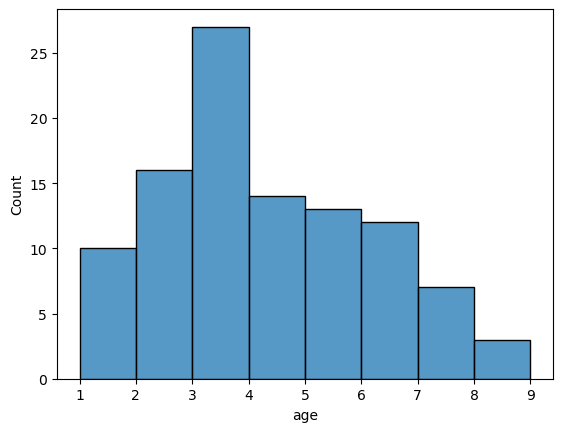

In [7]:
sns.histplot(data.age)

In [8]:
age_med=data['age'].median()
data['age'].fillna(age_med,inplace=True)

<AxesSubplot:xlabel='footlgth', ylabel='Count'>

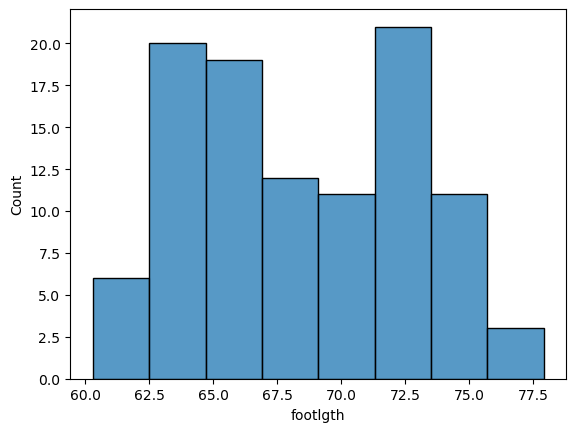

In [9]:
sns.histplot(data.footlgth)

In [10]:
foot_med=data['footlgth'].median()
data['footlgth'].fillna(foot_med,inplace=True)
data.isnull().sum()
# all missing values filled!


site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       104 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  104 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.7+ KB


#### Exploratory Data Analysis: Exploring the Dataset for Relationships between Variables

In [14]:
# A Quick Summary of the Numeric Variables
data.describe()
# notice that the site column is not included.


,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.817308,92.602885,56.883654,87.088462,37.009615,68.454808,48.130769,15.046154,27.000000,32.586538
std,2.349086,1.894112,3.573349,3.113426,4.310549,1.959518,4.374149,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,1.000000,2.750000,90.675000,54.975000,84.000000,35.875000,64.650000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


<AxesSubplot:xlabel='age', ylabel='Count'>

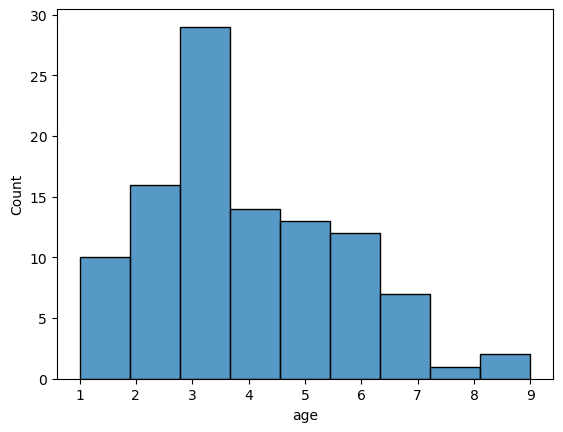

In [15]:
sns.histplot(data.age)

<AxesSubplot:xlabel='hdlngth', ylabel='Count'>

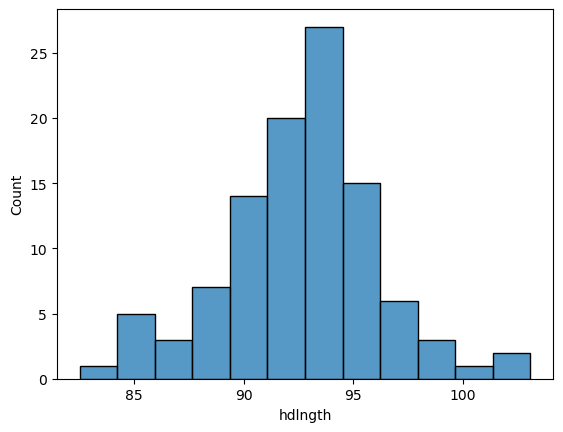

In [16]:
sns.histplot(data.hdlngth)

<AxesSubplot:xlabel='skullw', ylabel='Count'>

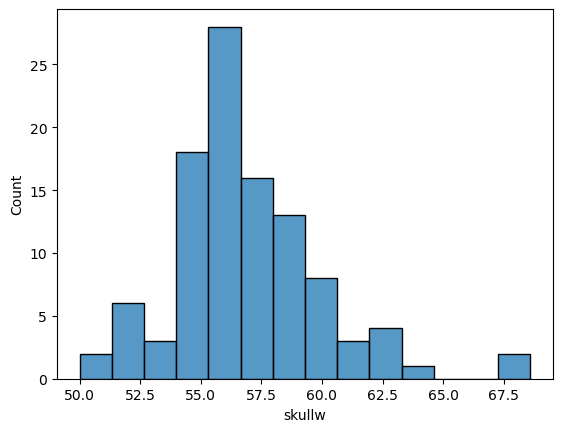

In [17]:
sns.histplot(data.skullw)

<AxesSubplot:xlabel='totlngth', ylabel='Count'>

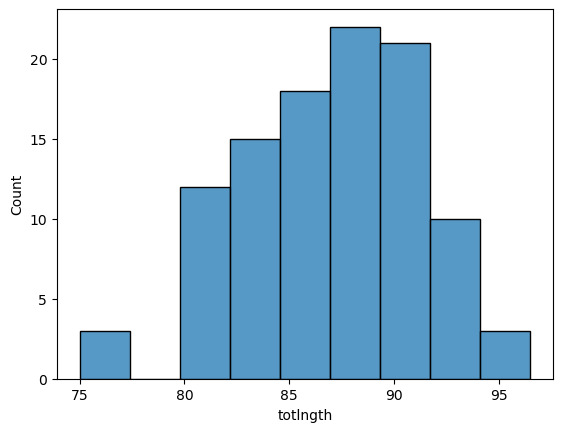

In [18]:
sns.histplot(data.totlngth)

<AxesSubplot:xlabel='taill', ylabel='Count'>

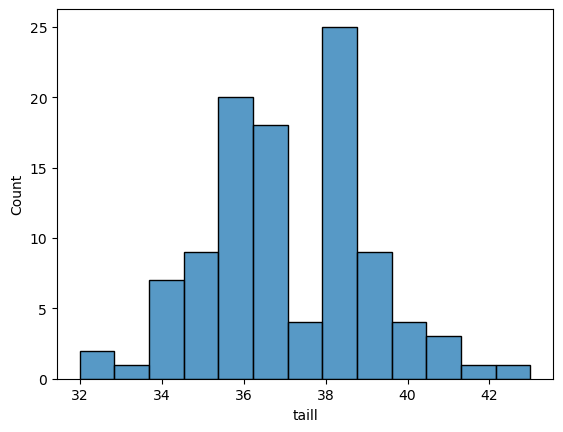

In [19]:
sns.histplot(data.taill)

<AxesSubplot:xlabel='footlgth', ylabel='Count'>

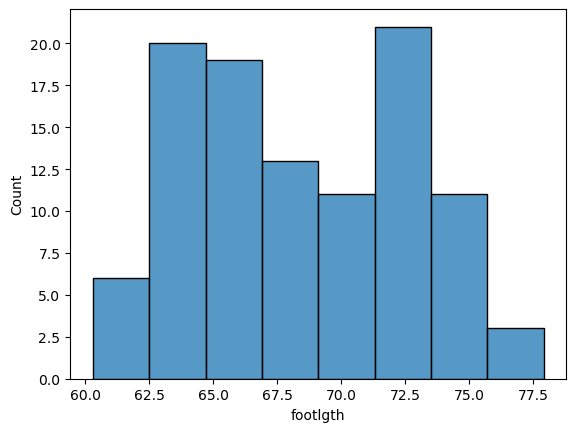

In [20]:
sns.histplot(data.footlgth)

<AxesSubplot:xlabel='earconch', ylabel='Count'>

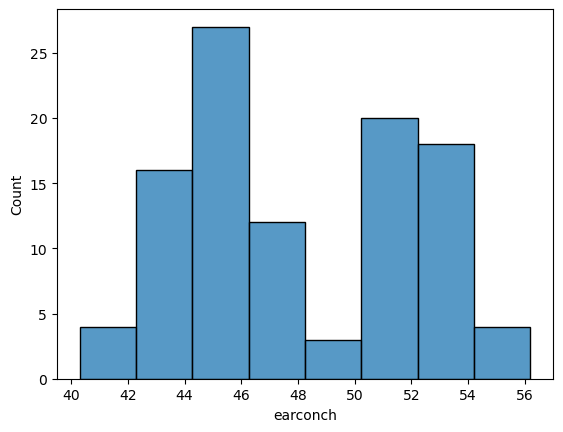

In [21]:
sns.histplot(data.earconch)

<AxesSubplot:xlabel='eye', ylabel='Count'>

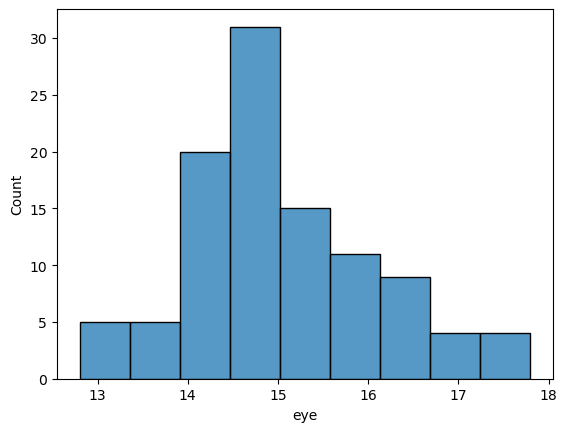

In [22]:
sns.histplot(data.eye)

<AxesSubplot:xlabel='chest', ylabel='Count'>

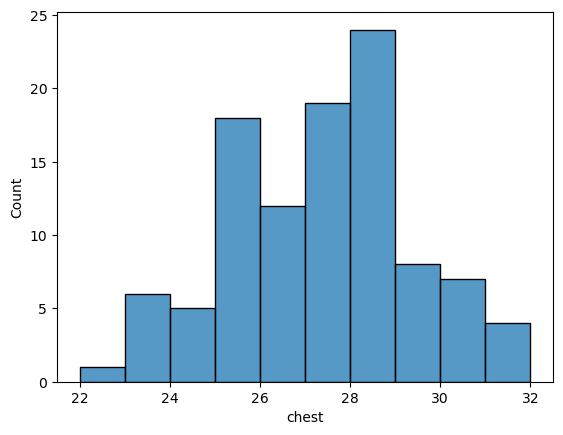

In [23]:
sns.histplot(data.chest)

<AxesSubplot:xlabel='belly', ylabel='Count'>

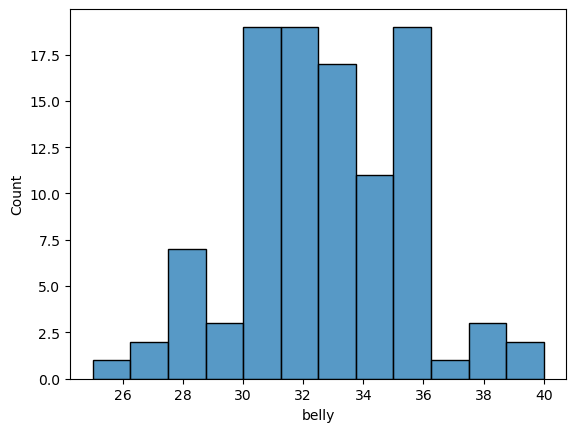

In [24]:
sns.histplot(data.belly)

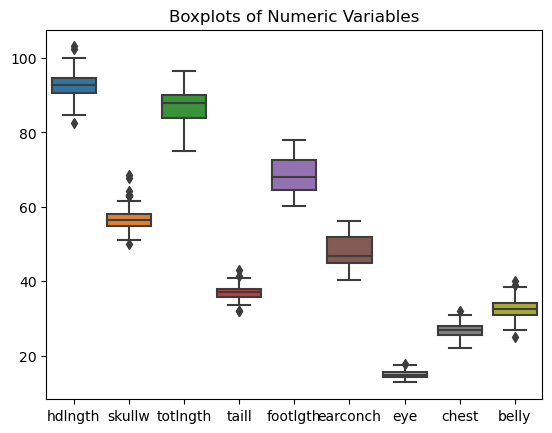

In [25]:
sns.boxplot(data=data[['hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']])
plt.title('Boxplots of Numeric Variables')
plt.show()

In [26]:
#sns.boxplot(data=data, x='totlngth', y='site')
#plt.title('Boxplots of Total Length by Site Where Trapped')
#plt.show()

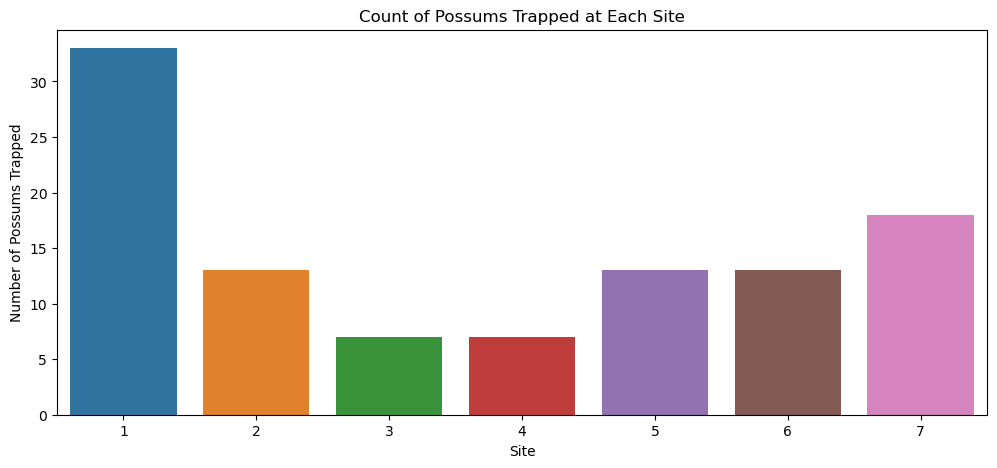

In [27]:
# How are the total trappings distributed across the 7 sites in the study?
site_count = data['site'].value_counts()

plt.figure(figsize=(12,5))
sns.barplot(x=site_count.index,
            y=site_count.values)
plt.title('Count of Possums Trapped at Each Site')
plt.ylabel('Number of Possums Trapped')
plt.xlabel('Site')

plt.show()


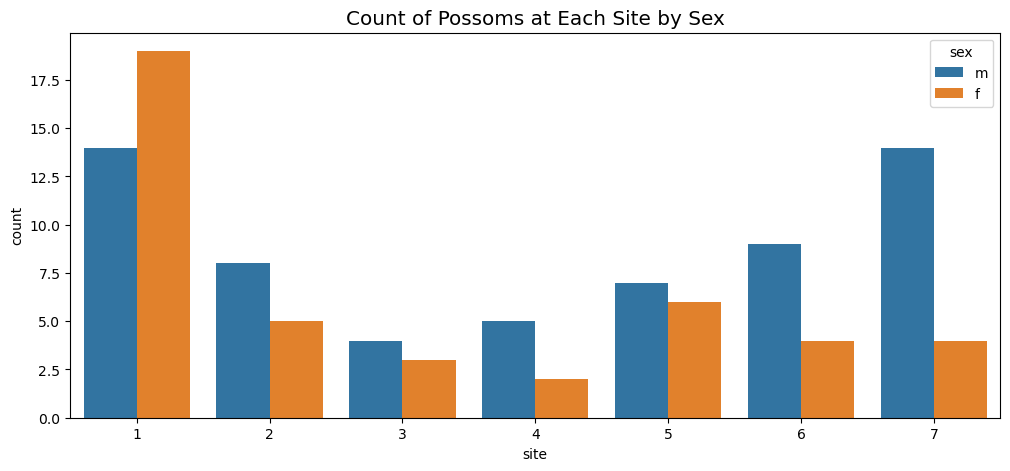

In [28]:
# How are the site trappings distributed across sex: male and female?
plt.figure(figsize=(12,5))
sns.countplot(x=data['site'],hue=data['sex'])
plt.title("Count of Possoms at Each Site by Sex",fontsize='x-large')
plt.show()

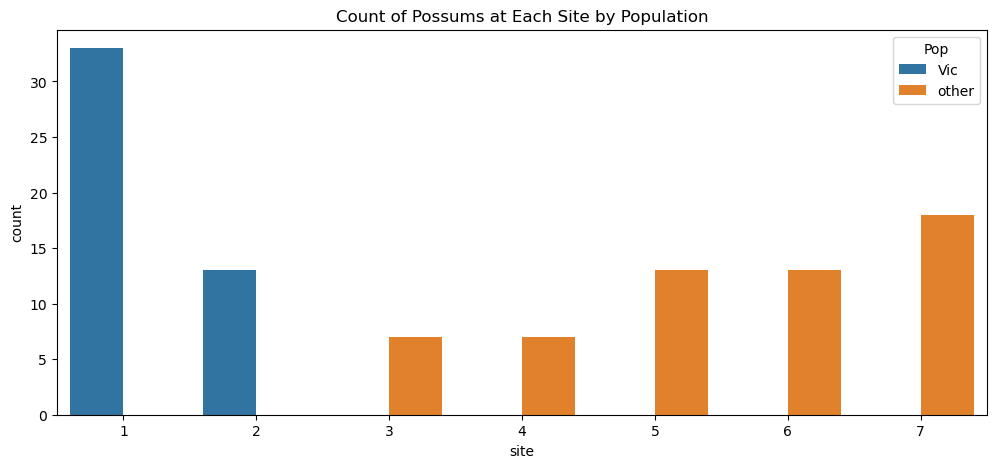

In [29]:
# How are the two populations: Vic (Victoria) or Other (New South Wales or Queensland) distributed across trapping sites?
plt.figure(figsize=(12,5))
sns.countplot(x=data['site'],hue=data['Pop'])
plt.title("Count of Possums at Each Site by Population")
plt.show()

In [30]:
data.corr()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.000000,-0.124648,-0.163646,-0.083548,-0.260843,0.380444,-0.780424,-0.790716,-0.036987,-0.345494,-0.175266
age,-0.124648,1.000000,0.321680,0.290232,0.264556,0.124729,0.118403,0.045009,0.239492,0.338276,0.350094
hdlngth,-0.163646,0.321680,1.000000,0.710827,0.691094,0.287429,0.390119,0.121463,0.347175,0.631498,0.562663
skullw,-0.083548,0.290232,0.710827,1.000000,0.526413,0.255921,0.275005,-0.000537,0.321991,0.629737,0.451838
totlngth,-0.260843,0.264556,0.691094,0.526413,1.000000,0.565646,0.443809,0.154484,0.247786,0.577890,0.519465
taill,0.380444,0.124729,0.287429,0.255921,0.565646,1.000000,-0.125963,-0.385136,0.198134,0.174997,0.294493
footlgth,-0.780424,0.118403,0.390119,0.275005,0.443809,-0.125963,1.000000,0.770888,0.004368,0.450566,0.302490
earconch,-0.790716,0.045009,0.121463,-0.000537,0.154484,-0.385136,0.770888,1.000000,-0.165092,0.199230,0.066527
eye,-0.036987,0.239492,0.347175,0.321991,0.247786,0.198134,0.004368,-0.165092,1.000000,0.149338,0.235716
chest,-0.345494,0.338276,0.631498,0.629737,0.577890,0.174997,0.450566,0.199230,0.149338,1.000000,0.606170


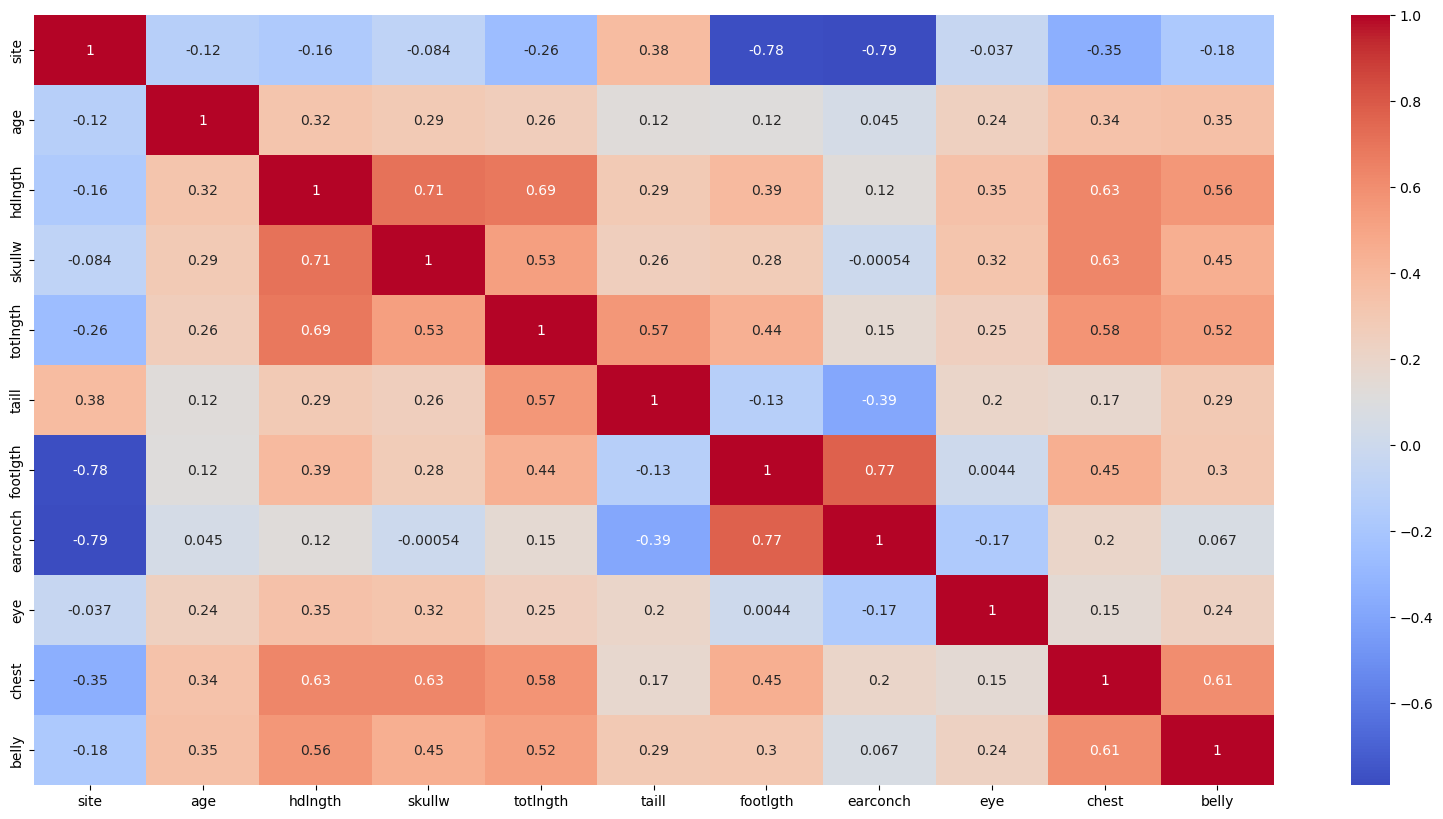

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

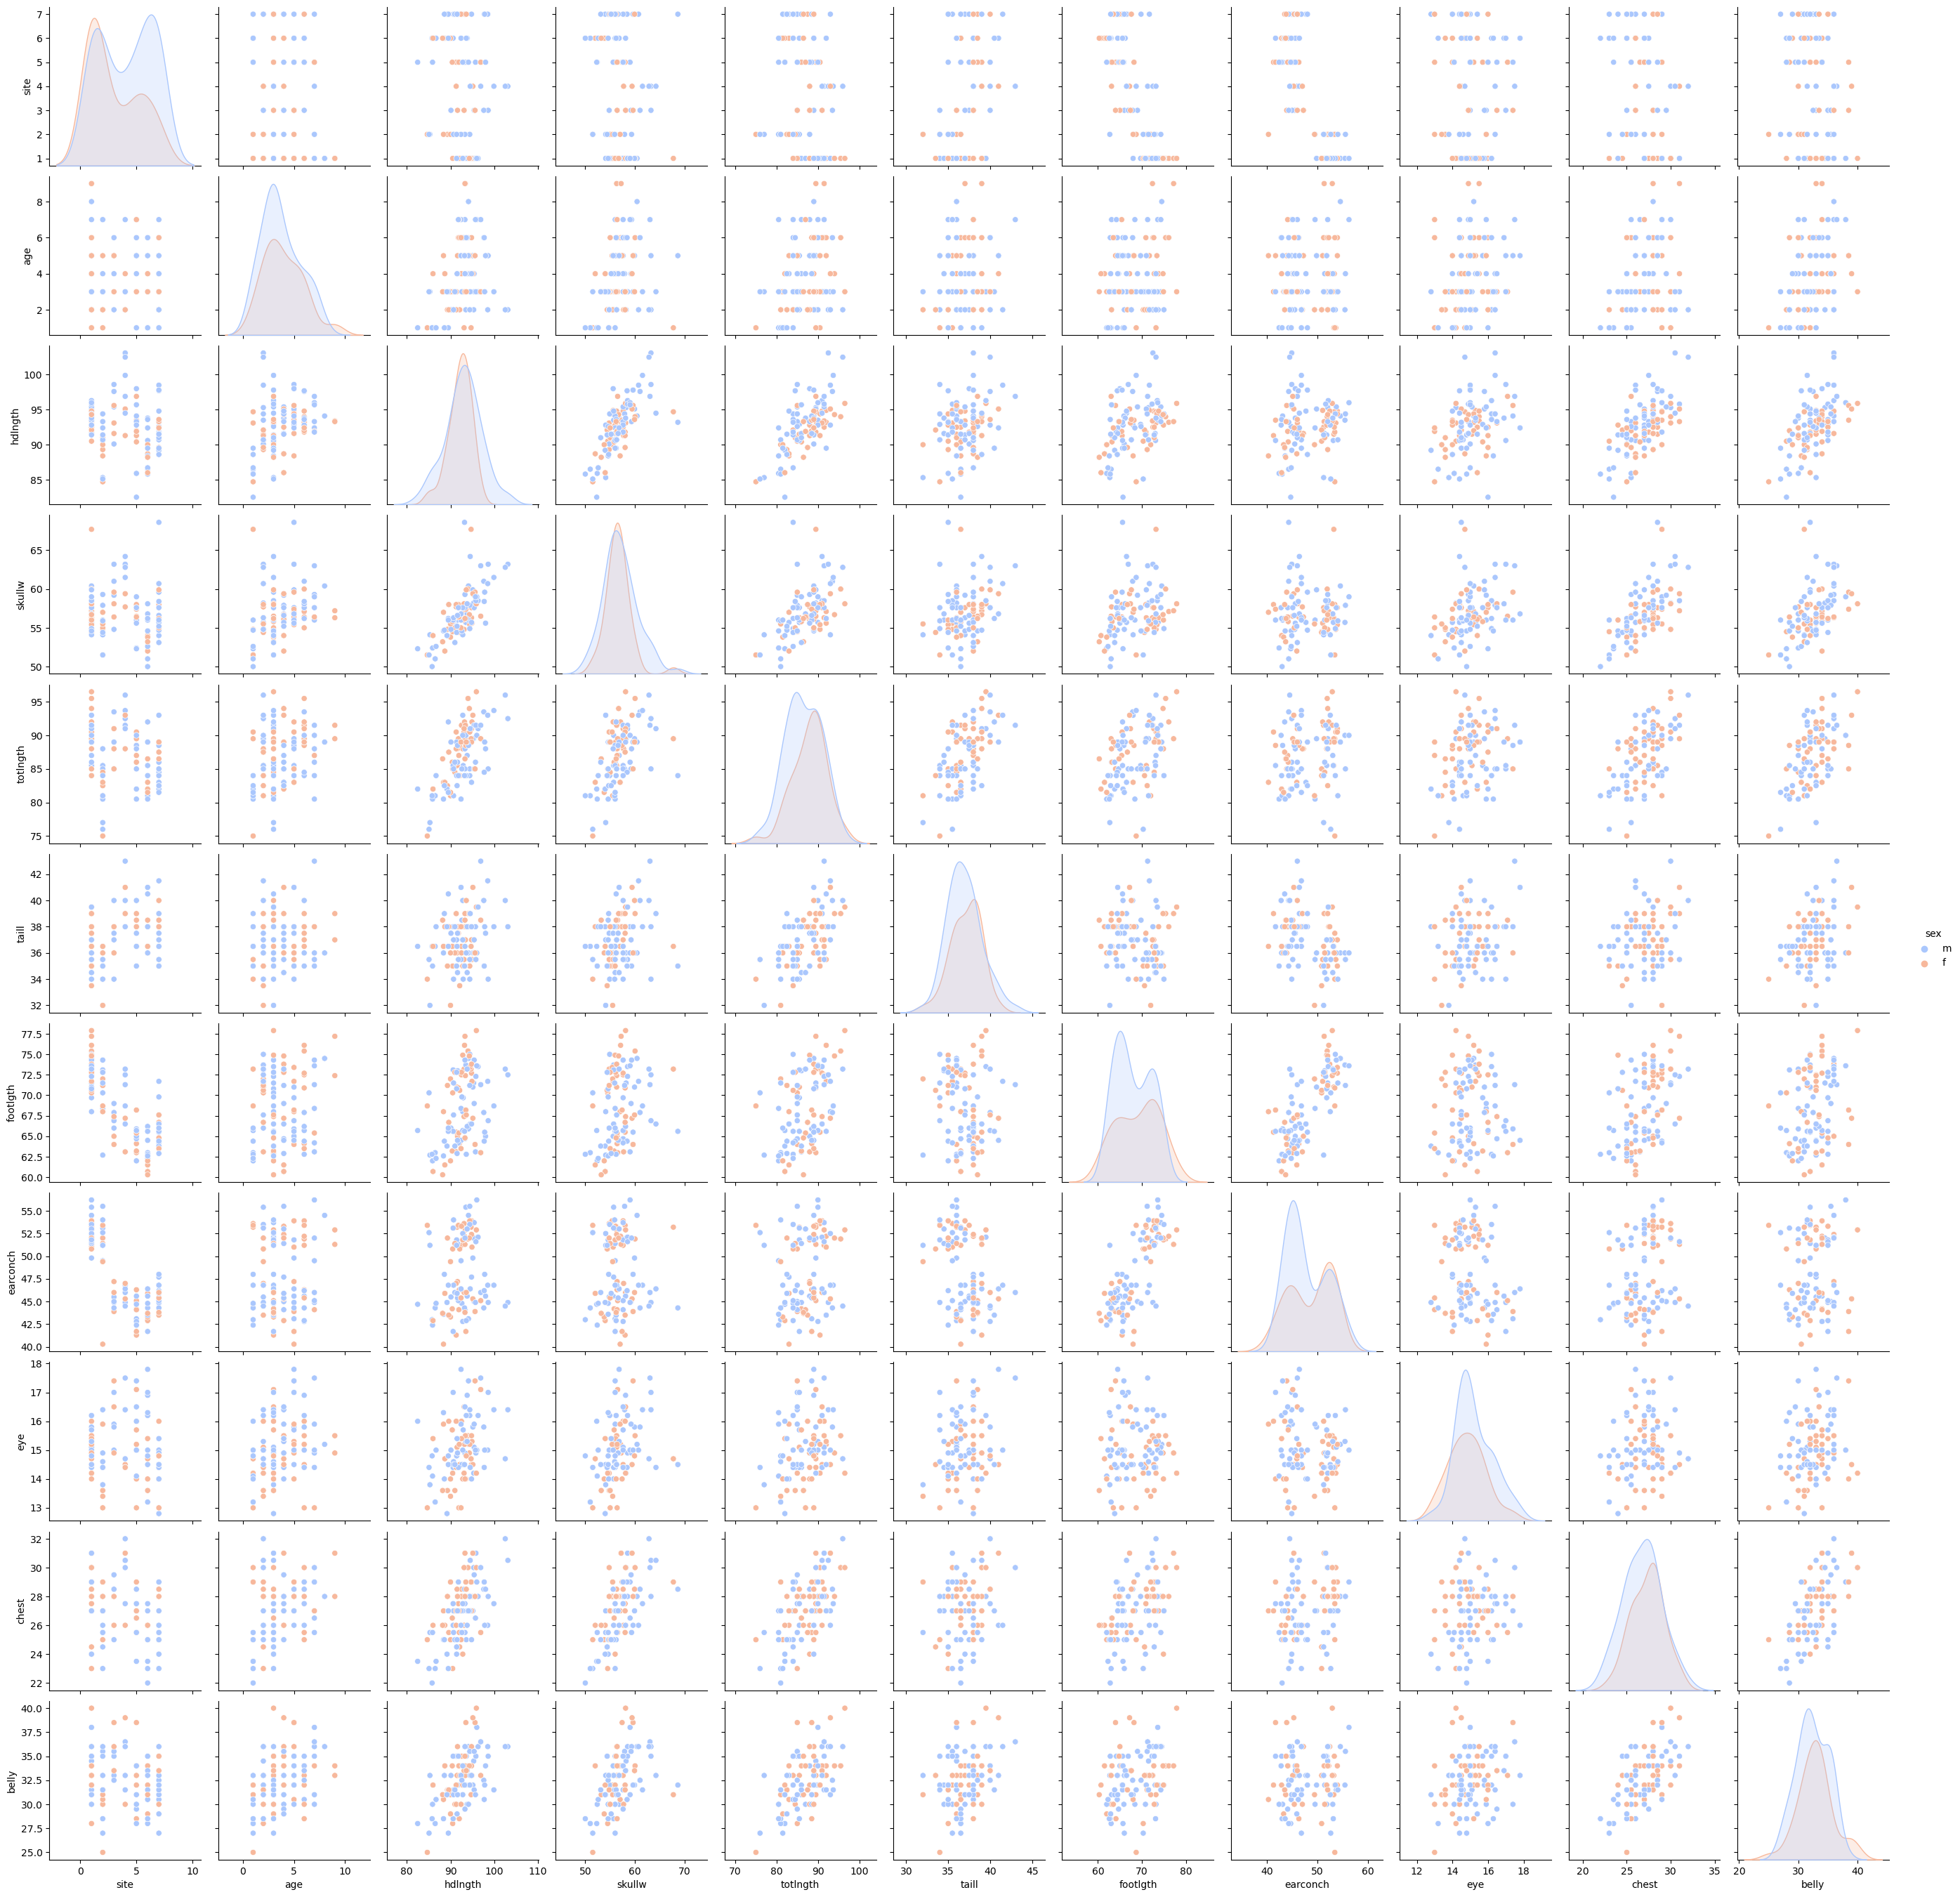

In [32]:
sns.pairplot(data,hue='sex',palette='coolwarm')
plt.show()

#### Creating Independent Variables and Dependent Variables to Predict

In [33]:
X=data.drop('sex',axis=1)
y=data[['sex']]

In [34]:
X.columns

Index(['site', 'Pop', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [35]:
X=pd.get_dummies(data[['site', 'Pop', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly']],drop_first=True)
X.head()

,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_other
0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0
1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0


#### Splitting the dataset into Training Set and Test Set

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.15,
                                                    random_state=40)

#### Training the Logistic Regression model

In [73]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,y_train.values.ravel())

LogisticRegression(max_iter=1000)

#### Confusion Matrix and Classification Report

In [74]:
y_pred=classifier.predict(X_test.values)

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[3 2]
 [3 8]]


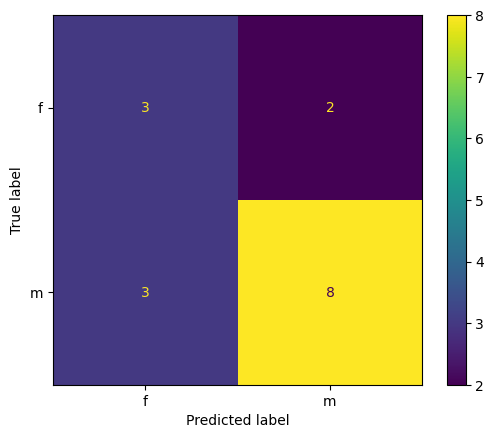

In [76]:
display=ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
display.plot()
plt.show()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           f       0.60      0.50      0.55         6
           m       0.73      0.80      0.76        10

    accuracy                           0.69        16
   macro avg       0.66      0.65      0.65        16
weighted avg       0.68      0.69      0.68        16

